In [34]:
from sklearn import cluster
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from kneed import KneeLocator

# Adjacency Matrix

In [35]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

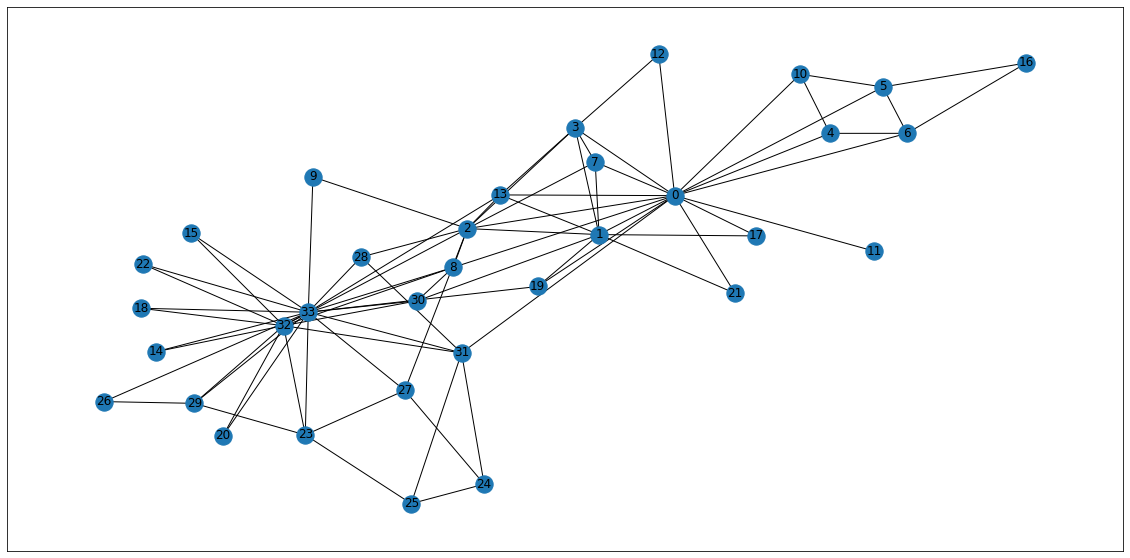

In [36]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G,pos=pos,with_labels=True)

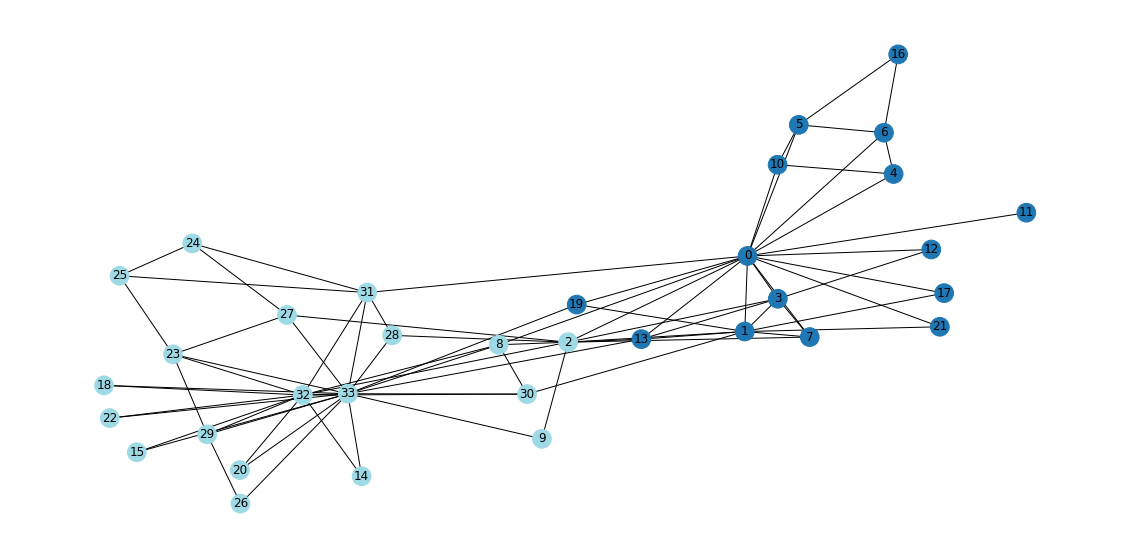

In [4]:
import markov_clustering as mc
import networkx as nx

# Build adjacency matrix
A = nx.to_numpy_array(G)   

# Run MCL algorithm
result = mc.run_mcl(A)
clusters = mc.get_clusters(result)
plt.figure(figsize=(20,10))
# Draw clusters
mc.draw_graph(A, clusters,pos=pos, node_size=350, with_labels=True)

In [147]:
K =range(1, 10)
inertias=[]
X = nx.to_numpy_array(G, nodelist=[i for i in range(34)])
X

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [148]:
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

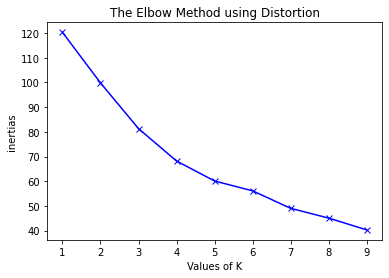

In [149]:
plt.plot(K,inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

In [150]:
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
k=kn.knee
k

4

In [159]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)

KMeans(n_clusters=4)

In [160]:
Nodes = pd.DataFrame([i for i in range(34)], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,3
9,9,3


In [161]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,0
1,1
2,32
3,8


In [162]:
community = []
for i in range(k):
    community.append(gk.get_group(i)['Node'].tolist())

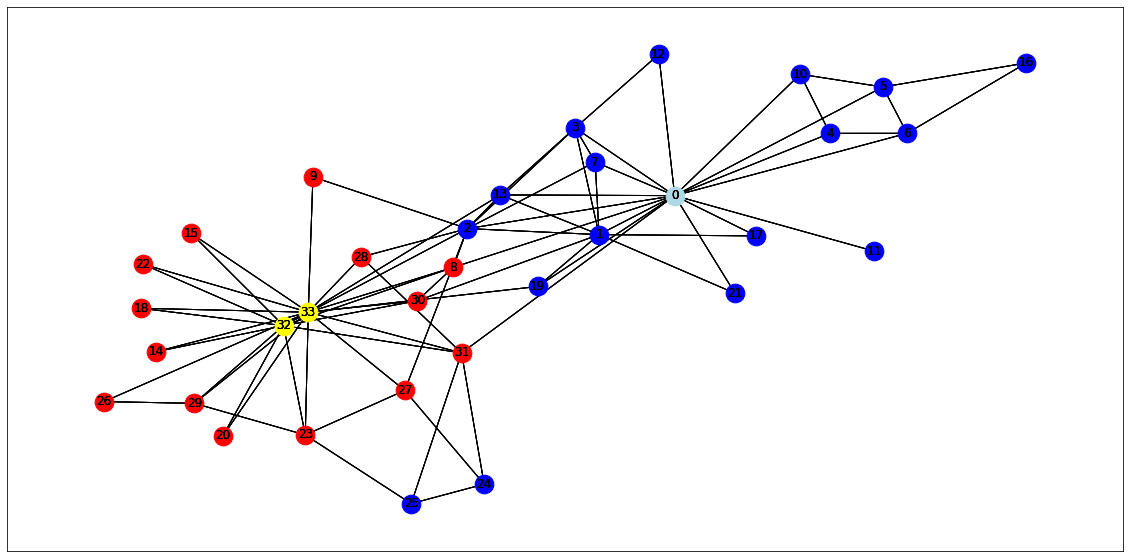

In [163]:
colors=['lightblue','blue','yellow','red','green','brown','grey','purple','pink','orange']
plt.figure(figsize=(20,10))
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=community[i], node_color= colors[i],with_labels=True,node_size=350)

# Centrality measures

In [16]:
deg_centrality = nx.degree_centrality(G)#Compute the degree centrality for nodes of the graph G

In [17]:
close_centrality = nx.closeness_centrality(G)#Compute the closeness centrality for nodes of the graph G

In [18]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)

In [19]:
eig_centrality=nx.eigenvector_centrality(G)

In [20]:
table=pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    table=table.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
table

,Node,DC,BC,CC,EC
0,0,0.484848,0.437635,0.568966,0.355483
1,1,0.272727,0.053937,0.485294,0.265954
2,2,0.303030,0.143657,0.559322,0.317189
3,3,0.181818,0.011909,0.464789,0.211174
4,4,0.090909,0.000631,0.379310,0.075966
5,5,0.121212,0.029987,0.383721,0.079481
6,6,0.121212,0.029987,0.383721,0.079481
7,7,0.121212,0.000000,0.440000,0.170955
8,8,0.151515,0.055927,0.515625,0.227405
9,9,0.060606,0.000848,0.434211,0.102675


In [21]:
trainingData = table[["DC","BC","CC","EC"]]
trainingData

,DC,BC,CC,EC
0,0.484848,0.437635,0.568966,0.355483
1,0.272727,0.053937,0.485294,0.265954
2,0.303030,0.143657,0.559322,0.317189
3,0.181818,0.011909,0.464789,0.211174
4,0.090909,0.000631,0.379310,0.075966
5,0.121212,0.029987,0.383721,0.079481
6,0.121212,0.029987,0.383721,0.079481
7,0.121212,0.000000,0.440000,0.170955
8,0.151515,0.055927,0.515625,0.227405
9,0.060606,0.000848,0.434211,0.102675


In [22]:
K =range(1, 10)
inertias=[]
X=nx.to_numpy_array(G, nodelist=[i for i in range(34)])
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(trainingData)
    inertias.append(kmeanModel.inertia_)

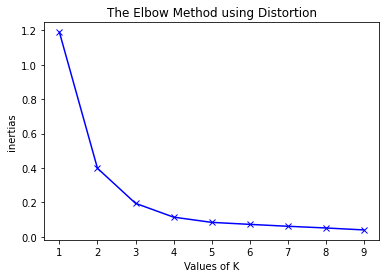

In [23]:
plt.plot(K,inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

In [24]:
from kneed import KneeLocator
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
k=kn.knee
k

3

In [25]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(trainingData)

KMeans(n_clusters=3)

In [26]:
Nodes = pd.DataFrame([i for i in range(34)], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,2
1,1,1
2,2,1
3,3,1
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [27]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,4
1,1
2,0


In [28]:
community = []
for i in range(k):
    community.append(gk.get_group(i)['Node'].tolist())

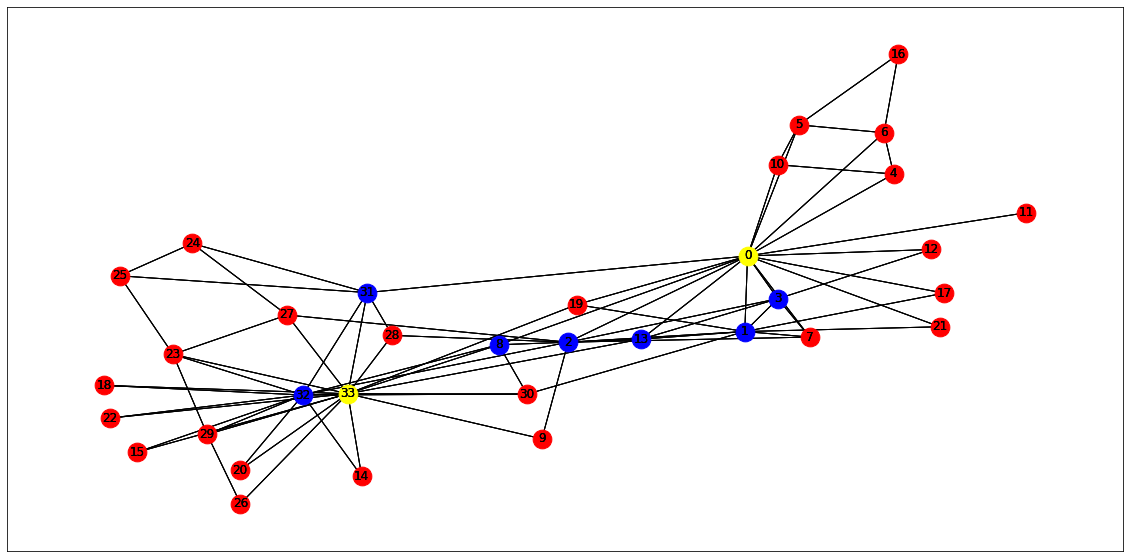

In [29]:
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange']
plt.figure(figsize=(20,10))
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=community[i], node_color= colors[i],with_labels=True,node_size=350)